In [1]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

## Reading from CSV

In [2]:
crypt = pd.read_csv("Crypto_Data.csv")
test = pd.read_csv("Crypto_Test.csv")
test.head()

,Cryptogram,Label
0,TK XZZ VZZKO QHVJ SZ XNWAD LS HXUNCYZYY RZHHLQ...,1
1,NFTRMS EMD TSSPWDDY NQ ZMOJQRWZOX ECTL MTSS NM...,1
2,MQDXX RFHG LX QZFC DFEPYX LNQ ATKWZSTTM HFSPW ...,1
3,LQDCYR EMD XFQNTMT XNNNDED HD F EZZMOFSTTM OJC...,1
4,PXDLWBSJQD BHEM SSJ XZZMR XBSTKLW ZHFQO TTC DN...,1


## Data Preprocessing 

In [3]:
train = crypt["Cryptogram"] 
target = crypt["Label"]
test_data = test["Cryptogram"]
test_target = test["Label"]

In [4]:
contVec = CountVectorizer()
train = contVec.fit_transform(train)
test_data = contVec.transform(test_data)

In [5]:
print("Shape of training features: ", train.shape)
print("Shape of training labels:  ", target.shape)
print("Shape of validation features: ", test_data.shape)
print("Shape of validation labels: ", test_target.shape)

Shape of training features:  (100, 1882)
Shape of training labels:   (100,)
Shape of validation features:  (20, 1882)
Shape of validation labels:  (20,)


## Evaluating Different Kernels using Training and Cross Validation Score on our Training Data

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [7]:
title_rbf = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
title_linear = "Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
title_poly = "Learning Curves (SVM, Poly kernel, $\gamma=0.001$)"
title_sig = "Learning Curves (SVM, Sigmoid kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
clf_rbf = SVC(kernel='rbf',gamma=0.001)
clf_linear = SVC(kernel='linear',gamma=0.001)
clf_poly = SVC(kernel='poly',gamma=0.001)
clf_sigmoid = SVC(kernel='sigmoid',gamma=0.001)

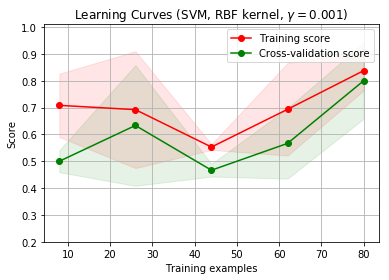

In [8]:
plot_learning_curve(clf_rbf, title_rbf, train, target, (0.2, 1.01), cv=cv, n_jobs=4).show()
#plt.show()

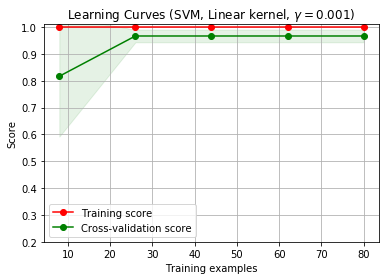

In [9]:
plot_learning_curve(clf_linear, title_linear, train, target, (0.2, 1.01), cv=cv, n_jobs=4).show()

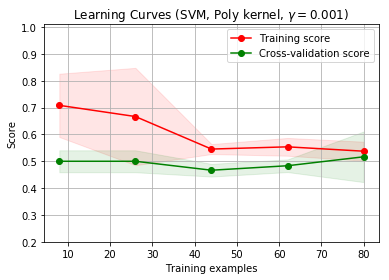

In [10]:
plot_learning_curve(clf_poly, title_poly, train, target, (0.2, 1.01), cv=cv, n_jobs=4).show()

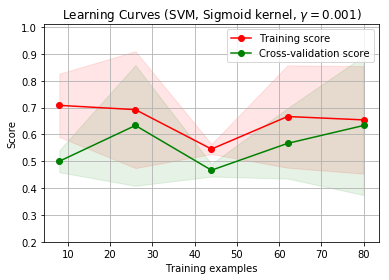

In [11]:
plot_learning_curve(clf_sigmoid, title_sig, train, target, (0.2, 1.01), cv=cv, n_jobs=4).show()

## Using SVM (Linear) because it has the best accuracy as seen above

In [12]:
final_SVC = clf_linear
final_SVC.fit(train,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Making Predictions and Printing the Classification Report

In [13]:
final_prediction = clf_linear.predict(test_data)
print(classification_report(test_target,final_prediction))
print("Confusion Matrix: ", confusion_matrix(test_target, final_prediction))
print("Accuracy: ", clf_linear.score(test_data, test_target))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        20

Confusion Matrix:  [[10  0]
 [ 0 10]]
Accuracy:  1.0
